# CAR PRICE PREDICTION


## Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [2]:
df=pd.read_csv("cars.csv")

In [3]:
df.head()

,Unnamed: 0,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometers,Fuel,Number_Of_Owners,Location,Price
0,0,Honda,City,V,2016,"46,948 Kms",Petrol,First,Chennai,7.45 Lakh
1,1,Toyota,Corolla Altis,1.8 J,2014,"72,497 Kms",Petrol,Second,Bangalore,8.25 Lakh
2,2,Honda,Brio,V MT,2015,"21,873 Kms",Petrol,First,Bangalore,4.89 Lakh
3,3,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT [2016-2017],2019,"17,916 Kms",Petrol,First,Kolkata,5 Lakh
4,4,Hyundai,Creta,1.6 S Petrol,2015,"27,598 Kms",Petrol,First,Bangalore,9.48 Lakh


In [4]:
# droping the Unnamed: 0 column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#i have extracted 5041 rows of cars data
df.shape

(5041, 9)

In [6]:
#we have 9 columns and 5041 rows

## EDA (Exploratory Data Analysis)

In [7]:
#checking columns
df.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Driven_Kilometers',
       'Fuel', 'Number_Of_Owners', 'Location', 'Price'],
      dtype='object')

In [8]:
#checking datatypes
df.dtypes

Brand                 object
Model                 object
Variant               object
Manufacturing_Year     int64
Driven_Kilometers     object
Fuel                  object
Number_Of_Owners      object
Location              object
Price                 object
dtype: object

In [9]:
#we have int and object data types

In [10]:
#lets check for null values
df.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_Kilometers     0
Fuel                  0
Number_Of_Owners      0
Location              0
Price                 0
dtype: int64

In [11]:
#we have zero null values

In [12]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

Brand 35
Model 232
Variant 1216
Driven_Kilometers 1396
Fuel 6
Number_Of_Owners 5
Location 54
Price 641


In [13]:
#lets remove Lakh in price and Kms, "," in Drive_Kilometers
df['Price'] = df['Price'].str.replace('Lakh', '')
df['Driven_Kilometers'] = df['Driven_Kilometers'].str.replace('Kms', '')
df['Driven_Kilometers'] = df['Driven_Kilometers'].str.replace(',', '')

In [14]:
df

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometers,Fuel,Number_Of_Owners,Location,Price
0,Honda,City,V,2016,46948,Petrol,First,Chennai,7.45
1,Toyota,Corolla Altis,1.8 J,2014,72497,Petrol,Second,Bangalore,8.25
2,Honda,Brio,V MT,2015,21873,Petrol,First,Bangalore,4.89
3,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT [2016-2017],2019,17916,Petrol,First,Kolkata,5
4,Hyundai,Creta,1.6 S Petrol,2015,27598,Petrol,First,Bangalore,9.48
...,...,...,...,...,...,...,...,...,...
5036,Hyundai,Eon,Era + AirBag,2016,26000,Petrol,First,Chennai,3.24
5037,Volkswagen,Vento,Comfortline Diesel AT,2015,65000,Diesel,First,Chennai,7.24
5038,Maruti Suzuki,Swift,LDi,2012,90000,Diesel,Second,Chennai,4.24
5039,Mercedes-Benz,GLC,220 d Prime,2017,58500,Diesel,First,Bangalore,46


In [15]:
#Lets change Driven_Kilometers dtype from object to int
df["Driven_Kilometers"] = df.Driven_Kilometers.astype(int)

In [16]:
#Lets change Price dtype from object to Float
df["Price"] = df.Price.astype(float)

In [17]:
#Lets convert Price into Lakh
df['Price'] = df['Price']*100000

In [18]:
df["Variant"].nunique()

1216

In [19]:
# droping the Variate column because we have high unique values in this
df.drop('Variant',axis=1,inplace=True)

In [20]:
df

,Brand,Model,Manufacturing_Year,Driven_Kilometers,Fuel,Number_Of_Owners,Location,Price
0,Honda,City,2016,46948,Petrol,First,Chennai,745000.0
1,Toyota,Corolla Altis,2014,72497,Petrol,Second,Bangalore,825000.0
2,Honda,Brio,2015,21873,Petrol,First,Bangalore,489000.0
3,Hyundai,Grand i10,2019,17916,Petrol,First,Kolkata,500000.0
4,Hyundai,Creta,2015,27598,Petrol,First,Bangalore,948000.0
...,...,...,...,...,...,...,...,...
5036,Hyundai,Eon,2016,26000,Petrol,First,Chennai,324000.0
5037,Volkswagen,Vento,2015,65000,Diesel,First,Chennai,724000.0
5038,Maruti Suzuki,Swift,2012,90000,Diesel,Second,Chennai,424000.0
5039,Mercedes-Benz,GLC,2017,58500,Diesel,First,Bangalore,4600000.0


## Data Visulization

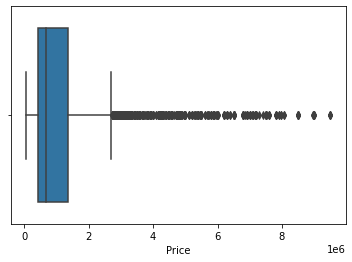

In [21]:
#lets check the box plot of our target column, to check if there are outliers
sns.boxplot(df.Price)
plt.show()

From the above plot we can see there are many outliers in the target column

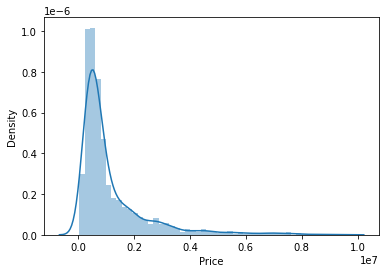

In [22]:
#lets check the distribution of the target column
sns.distplot(df.Price)
plt.show()

From the above plot we can see that data is right skewed in target column

## Bivariate Analysis with Target Variable

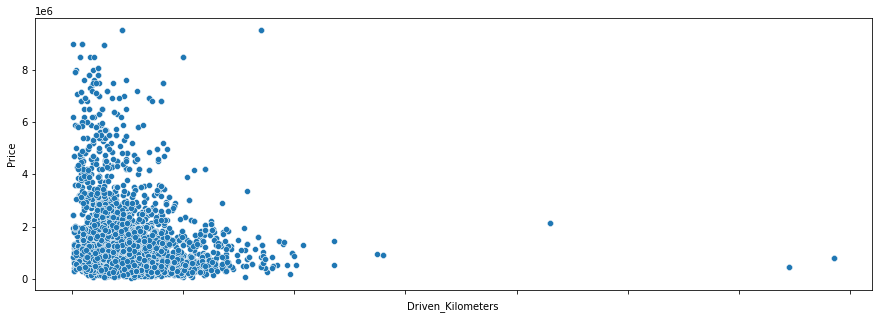

In [23]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.scatterplot(x = df['Driven_Kilometers'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [24]:
#we don't see any linaer relationship between Km_driven and Price

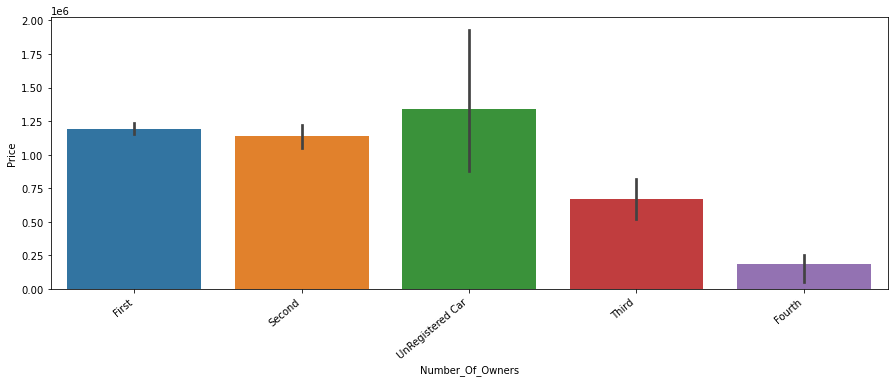

In [25]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Number_Of_Owners' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [26]:
#we can see that Unregister car has more price compare to other

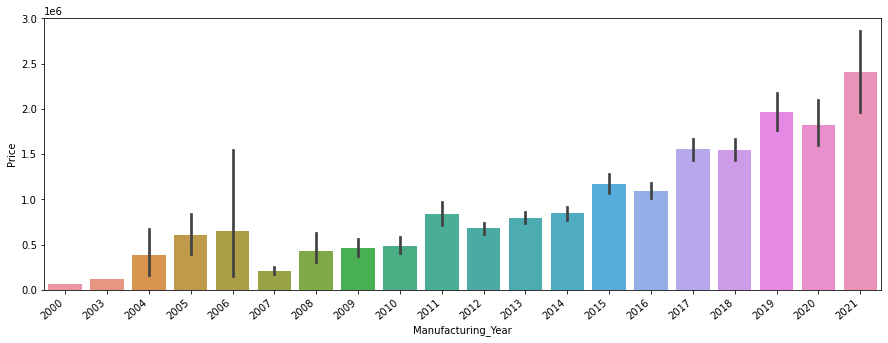

In [27]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Manufacturing_Year' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [28]:
#we can see that if the car is recently purchased than the  price is high

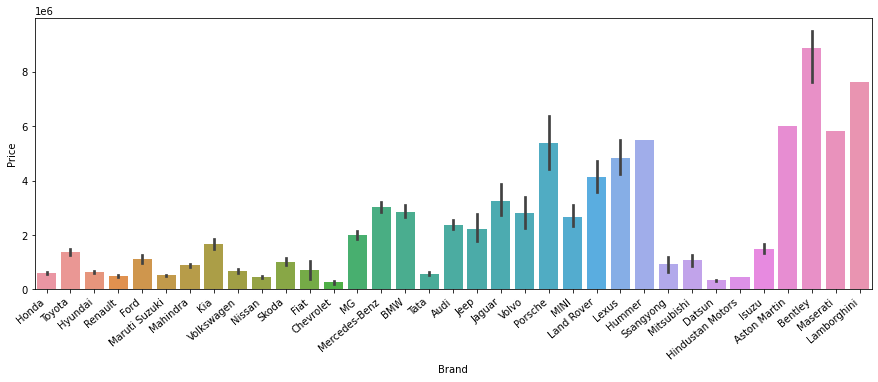

In [29]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Brand' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [30]:
#we can see that Bentley,Lamborgini,Aston Martin has more price compare to all

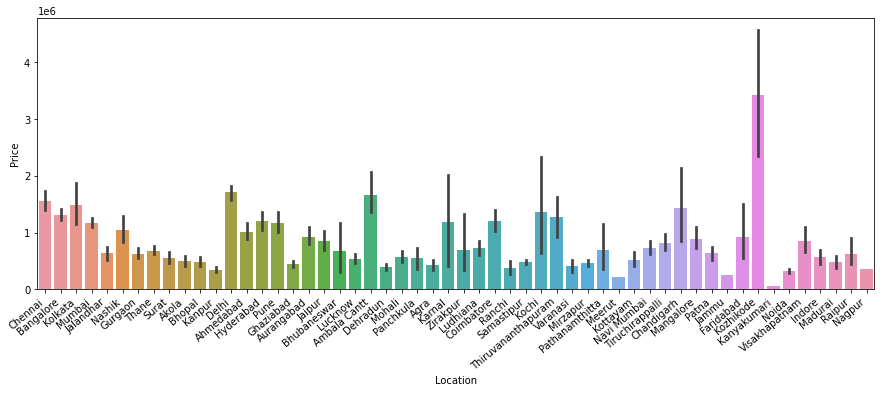

In [31]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Location' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [32]:
#we can see that Kozhikode location have high price and kanyakumari location have low prices

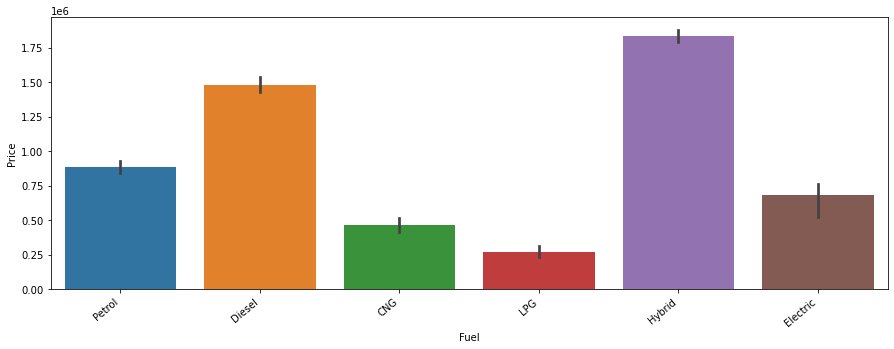

In [33]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Fuel' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [34]:
#we can see that Hybrid type of transmission have high price and LPG type of transmission have low price

## Encoding the Object Columns

In [35]:
df.dtypes

Brand                  object
Model                  object
Manufacturing_Year      int64
Driven_Kilometers       int32
Fuel                   object
Number_Of_Owners       object
Location               object
Price                 float64
dtype: object

In [36]:
df['Number_Of_Owners'].value_counts()

First               4017
Second               919
Third                 78
UnRegistered Car      24
Fourth                 3
Name: Number_Of_Owners, dtype: int64

In [37]:
le = LabelEncoder()
df['Number_Of_Owners'] = le.fit_transform(df.Number_Of_Owners.values)

In [38]:
one_hot_columns = ['Location','Manufacturing_Year','Brand', 'Model',"Fuel",]

In [39]:
df_new = pd.get_dummies(data = df,columns=one_hot_columns)

In [40]:
df_new

,Driven_Kilometers,Number_Of_Owners,Price,Location_Agra,Location_Ahmedabad,Location_Akola,Location_Ambala Cantt,Location_Aurangabad,Location_Bangalore,Location_Bhopal,...,Model_e2o Plus,Model_i10,Model_i20,Model_i20 Active,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_LPG,Fuel_Petrol
0,46948,0,745000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,72497,2,825000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,21873,0,489000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,17916,0,500000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,27598,0,948000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,26000,0,324000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5037,65000,0,724000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5038,90000,2,424000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5039,58500,0,4600000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
#now we have 350 columns after enoding object columns
df_new.shape

(5041, 350)

## Scaling the Data

In [42]:
#lets split our x and y column before scaling
#x and y spitting
Y = df_new['Price']
X = df_new.drop('Price',axis = 1)

In [43]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
scaled_X.head()

,Driven_Kilometers,Number_Of_Owners,Location_Agra,Location_Ahmedabad,Location_Akola,Location_Ambala Cantt,Location_Aurangabad,Location_Bangalore,Location_Bhopal,Location_Bhubaneswar,...,Model_e2o Plus,Model_i10,Model_i20,Model_i20 Active,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_LPG,Fuel_Petrol
0,-0.190069,-0.494084,-0.067702,-0.242968,-0.042291,-0.042291,-0.066207,-0.378949,-0.105028,-0.046764,...,-0.014086,-0.137846,-0.10308,-0.05463,-0.105989,-0.98758,-0.024402,-0.019922,-0.048848,1.016603
1,0.506160,1.800415,-0.067702,-0.242968,-0.042291,-0.042291,-0.066207,2.638876,-0.105028,-0.046764,...,-0.014086,-0.137846,-0.10308,-0.05463,-0.105989,-0.98758,-0.024402,-0.019922,-0.048848,1.016603
2,-0.873380,-0.494084,-0.067702,-0.242968,-0.042291,-0.042291,-0.066207,2.638876,-0.105028,-0.046764,...,-0.014086,-0.137846,-0.10308,-0.05463,-0.105989,-0.98758,-0.024402,-0.019922,-0.048848,1.016603
3,-0.981211,-0.494084,-0.067702,-0.242968,-0.042291,-0.042291,-0.066207,-0.378949,-0.105028,-0.046764,...,-0.014086,-0.137846,-0.10308,-0.05463,-0.105989,-0.98758,-0.024402,-0.019922,-0.048848,1.016603
4,-0.717370,-0.494084,-0.067702,-0.242968,-0.042291,-0.042291,-0.066207,2.638876,-0.105028,-0.046764,...,-0.014086,-0.137846,-0.10308,-0.05463,-0.105989,-0.98758,-0.024402,-0.019922,-0.048848,1.016603


In [44]:
#now our data is scaled using standard scaler

## PCA (Principal Component Analysis)

In [45]:
#we need to use pca becuase we have 227 columns in this dataset which is very high

In [46]:
#we should always use scaled data for performing the PCA

In [47]:
#we have 349 columns excluding target variable
scaled_X.shape

(5041, 349)

In [48]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [49]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score

array([  0.97227755,   1.7194573 ,   2.42354183,   3.0844121 ,
         3.73674975,   4.3756313 ,   5.00580946,   5.63203887,
         6.25279581,   6.86504671,   7.47563602,   8.08278173,
         8.68631975,   9.28698753,   9.88703572,  10.48494441,
        11.08121639,  11.67488314,  12.26760044,  12.8593251 ,
        13.45050409,  14.0411124 ,  14.6300365 ,  15.21645567,
        15.80119184,  16.38538602,  16.96758254,  17.54936314,
        18.13019525,  18.70942366,  19.28608057,  19.86210958,
        20.43656039,  21.01004554,  21.58338928,  22.10868445,
        22.63077689,  23.10676311,  23.56232396,  24.01272634,
        24.46062044,  24.89763689,  25.3306872 ,  25.75910068,
        26.18355803,  26.60529497,  27.02313732,  27.43510646,
        27.8430256 ,  28.24847108,  28.6493693 ,  29.04697901,
        29.44060438,  29.83319742,  30.22230174,  30.60642827,
        30.99031712,  31.37182572,  31.75088971,  32.12652022,
        32.50116506,  32.87292847,  33.24140581,  33.60

In [50]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 278


In [51]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 256


In [52]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 85)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 236


In [53]:
#now we have seen that how much data will be lost based number of columns

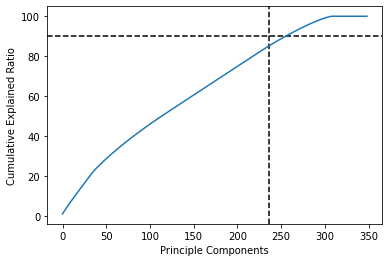

In [54]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

In [55]:
#lets perform the PCA with 256 columns which is 90% of our data
Final_pca = PCA(n_components= 256)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [56]:
#lets create a datafram
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.961578,-0.816867,-1.635725,0.668263,0.017001,1.961914,0.056745,-0.326386,-2.133220,0.560345,...,-0.008917,0.686585,0.196566,0.293969,-0.014939,0.044884,-0.398299,0.218034,-0.403103,-0.041673
1,0.156708,-1.793708,-0.900029,0.777790,1.842743,1.818019,-1.009186,0.705025,1.423400,-0.329351,...,-0.382952,0.268933,0.050812,-0.009190,-0.613916,0.899397,-0.487068,0.763255,0.346649,-0.356166
2,-2.108551,-0.718802,-1.854647,0.653948,-0.534273,1.691129,0.045022,-0.689316,-1.721662,0.270107,...,-0.394760,-0.792450,-0.658665,-0.755958,1.680758,-0.769286,-1.381705,-0.430335,0.466806,0.459098
3,-2.323096,1.187118,-0.847902,-2.716626,0.557048,-0.872897,-0.109530,1.428647,0.439450,-0.214226,...,-0.410660,-0.630556,-0.081171,-0.920076,0.231725,-0.178097,0.122858,0.725476,0.028372,0.765256
4,-1.586166,0.263758,-1.006465,-2.504544,0.762448,-1.067600,-0.009544,0.846566,0.479966,-0.442080,...,-0.221139,-0.008981,0.679643,0.192148,0.472385,-0.033833,-0.468689,0.167268,-0.011820,-0.274452


In [57]:
print("variance is : {}".format(np.sum(Final_pca.explained_variance_ratio_)))

variance is : 0.893080666060027


In [58]:
pca_x.shape

(5041, 256)

## Best random state

In [59]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(pca_x,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state))

Best r2 score is 0.7557804863992295 on random state 45


In [60]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 45


In [61]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,Y,test_size=.22,random_state= rand_state )

In [62]:
lrg = LinearRegression()
lrg.fit(x_train,y_train)
pr =lrg.predict(x_test)
print("r2_score of linear refression is :", r2_score(y_test,pr))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score of linear refression is : 0.7557804863992295
Error :
mean absolute error : 1401450.7497591735
mean squared error :  34264005951725.082
root mean squared error : 5853546.442262595


## Model selection 

In [63]:
#lets Choose r2 score of below four Models
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [64]:
#checking each model with Cross val score
model_list = [dtc,knn,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,pca_x,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.abs(r2_score(y_test,pred) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



DecisionTreeRegressor()
Scores :
r2 score: 0.7876683671643416
Cross Val score : 0.5862701194900034
Error :
mean absolute error : 196080.33033033035
mean squared error :  352815053078.07806
root mean squared error : 593982.36764914
Difference :
Diffrence between cross val score and r2 score is : 0.20


KNeighborsRegressor()
Scores :
r2 score: 0.7300517909353378
Cross Val score : 0.6633897072224835
Error :
mean absolute error : 285387.5675675676
mean squared error :  448552061873.8739
root mean squared error : 669740.2943483944
Difference :
Diffrence between cross val score and r2 score is : 0.07


RandomForestRegressor()
Scores :
r2 score: 0.9063554631455253
Cross Val score : 0.7966674716005798
Error :
mean absolute error : 169207.97804232803
mean squared error :  155601884653.5004
root mean squared error : 394464.0473522275
Difference :
Diffrence between cross val score and r2 score is : 0.11


AdaBoostRegressor()
Scores :
r2 score: 0.5313659638628508
Cross Val score : 0.486242269205

In [65]:
#Random forest giving high r2 score and compare to others errors also less

## 1. Random forest regressor - hyperparameter tuning

In [66]:
#lets use random forest regressor
#it takes a lot lot of time approx 6 hours, so commented after
parameters = {'n_estimators' : [100,200,300],'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
gsvrf = RandomizedSearchCV(rf, parameters, cv=5,scoring="r2")
gsvrf.fit(x_train,y_train)
print(gsvrf.best_score_)
print(gsvrf.best_params_)

0.8777140176971837
{'n_estimators': 300, 'max_features': 'auto', 'criterion': 'mae'}


## 2. KNN regressor - Hyperparameter tuning

In [67]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'n_neighbors':list(range(5,16,2)),'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':list(range(25,35))}
#using randomised search CV
gsvkn = RandomizedSearchCV(estimator= knn , param_distributions= parameters,cv =5)
gsvkn.fit(x_train,y_train) 
print(gsvkn.best_score_)
print(gsvkn.best_params_)

0.8333579771379401
{'weights': 'distance', 'n_neighbors': 7, 'leaf_size': 25, 'algorithm': 'auto'}


In [68]:
#we got our best parameters for knn using the randomized serach cv

## creating knn model using these parameters

In [70]:
#lets create knn model using these parameters
print('KNeighborsRegressor')
hyper_p_knn = KNeighborsRegressor(n_neighbors= 7 ,weights= 'distance', leaf_size= 25, algorithm= 'auto')
hyper_p_knn.fit(x_train,y_train)
hyper_p_pred = hyper_p_knn.predict(x_test)
cvs = cross_val_score(hyper_p_knn,pca_x,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,hyper_p_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,hyper_p_pred))
print('mean squared error : ', mean_squared_error(y_test,hyper_p_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,hyper_p_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,hyper_p_pred) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))

KNeighborsRegressor


Scores :
r2 score: 0.8811447553558078
Cross Val score : 0.7387489831081567
Error :
mean absolute error : 154701.65913533766
mean squared error :  197492568053.69574
root mean squared error : 444401.3591942488
Difference :
Diffrence between cross val score and r2 score is : 0.14


## Creating Random Forest model using these parameters

In [71]:
final_model_rf = RandomForestRegressor(n_estimators= 300,criterion= 'mae',max_features = 'auto')
final_model_rf.fit(x_train,y_train)
final_pred = final_model_rf.predict(x_test)
cvs = cross_val_score(final_model_rf,pca_x,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,final_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,final_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,final_pred) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
least_difference.append((m,'Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference)))



Scores :
r2 score: 0.8992801740996946
Cross Val score : 0.8007866478022319
Error :
mean absolute error : 172482.64414414414
mean squared error :  167358345275.54807
root mean squared error : 409094.54319942725
Difference :
Diffrence between cross val score and r2 score is : 0.10


In [72]:
#now our r2 score got incresed 89.92% after hyperparameter tuning
#diffrence between cross val score and r2 score is also 0.10
#which means no overfitting

## Saving the model:

In [73]:
#serialization using joblib
import joblib
joblib.dump(final_model_rf,'Cars_Price.obj')

['Cars_Price.obj']

In [74]:
Cars_Price = joblib.load('Cars_Price.obj')

In [75]:
s_pred = Cars_Price.predict(x_test)

In [76]:
r2_score(y_test,s_pred)

0.8992801740996946

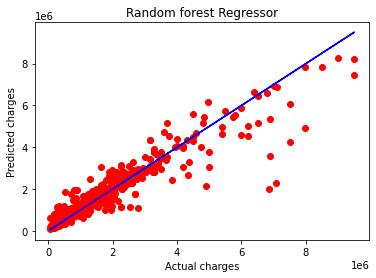

In [77]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = s_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Random forest Regressor')
plt.show()

### we can see that values are very close to the line

## Conclusuion : predicted x_test

In [78]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Cars_Price.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109
Predicted,679063.333333,363140.0,1.134447e+06,659183.333333,734070.0,2270800.0,1994700.0,828236.666667,4238055.0,617260.0,...,327840.0,416370.0,1681760.0,729858.333333,450716.666667,584260.0,3119900.0,1.499613e+06,625313.333333,1.991443e+06
Actual,695000.000000,365000.0,1.125000e+06,330000.000000,525000.0,2600000.0,1995000.0,825000.000000,7500000.0,650000.0,...,295000.0,340000.0,1499000.0,680000.000000,420000.000000,375000.0,2500000.0,1.475000e+06,616000.000000,2.295000e+06
